In [184]:
import pandas as pd
import numpy as np
import h5py
from pprint import pprint
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

sns.set_style("whitegrid")

In [185]:
filename = "result/recidivism_sex_all.h5"
with h5py.File(filename, 'r') as hdf:
    base_items = list(hdf.keys())
    print("root:")
    print(base_items)
    
    meta = hdf.get('meta').get('table')
    print("\nroot > meta:")
    print(meta)
    
    method_parameters = hdf.get('method_parameters')
    method_parameters_items = list(method_parameters.keys())
    print("\nroot > method_parameters:")
    print(method_parameters_items)
    
    task_parameters = hdf.get('task_parameters')
    task_parameters_items = list(task_parameters.keys())
    print("\nroot > task_parameters:")
    print(task_parameters_items)  
    
    task_parameters_i_table = task_parameters.get('_i_table')
    task_parameters_i_table_items = list(task_parameters_i_table.keys())
    print("\nroot > task_parameters > _i_table:")
    print(task_parameters_i_table_items)     
    
    task_parameters_table = task_parameters.get('table')
    print("\nroot > task_parameters > table:")
    print(type(task_parameters_table))

root:
['meta', 'method_parameters', 'results', 'task_parameters']

root > meta:
<HDF5 dataset "table": shape (1,), type "|V24">

root > method_parameters:
['GroupFairnessSRL', 'Naive', 'OffsetTree']

root > task_parameters:
['_i_table', 'table']

root > task_parameters > _i_table:
['index']

root > task_parameters > table:
<class 'h5py._hl.dataset.Dataset'>


In [186]:
from astropy.table import Table
import tables
filehdf5 = tables.open_file(filename)

columns0 = Table(filehdf5.root.results.block0_items.read()).to_pandas()
tab0 = Table(filehdf5.root.results.block0_values.read()).to_pandas()
tab0.columns = columns0.values.astype(str).tolist()[0]

columns1 = Table(filehdf5.root.results.block1_items.read()).to_pandas()
tab1 = Table(filehdf5.root.results.block1_values.read()).to_pandas()
tab1.columns = columns1.values.astype(str).tolist()[0]

columns2 = Table(filehdf5.root.results.block2_items.read()).to_pandas()
tab2 = Table(filehdf5.root.results.block2_values.read())
tab2 = pd.DataFrame(tab2['col0'].data)
tab2.columns = columns2.values.astype(str).tolist()[0]

columns3 = Table(filehdf5.root.results.block3_items.read()).to_pandas()
tab3 = Table(filehdf5.root.results.block3_values.read()).to_pandas()
tab3.columns = columns3.values.astype(str).tolist()[0]
pd.options.display.max_columns = None
pd.options.display.max_rows = None
temp = pd.concat([tab0, tab1, tab2, tab3], axis=1)
#temp[temp.name == 'GroupFairnessSRL']

In [187]:
temp

,is_seldonian,accept,predicted_accept,candidate_bqf_0_mean,candidate_co_0_mean,return_candidate,safety_bqf_0_mean,safety_co_0_mean,return_safety,train_bqf_0_mean,train_co_0_mean,return_train,test_bqf_0_mean,test_co_0_mean,return_test,co_0_safety_thresh,co_0_psafety_thresh,train_time,name,tid,pid,seed
0,False,True,True,0.010893,-0.089107,0.825337,0.016492,-0.083508,0.641941,0.014375,-0.085625,0.715286,0.026132,-0.073868,0.387502,NaN,NaN,0.985358,OffsetTree,0,0,10596053
1,False,True,True,0.000000,-0.100000,0.807462,0.000000,-0.100000,0.428377,0.000000,-0.100000,0.579982,0.000000,-0.100000,0.792592,NaN,NaN,34366.745684,Naive,0,0,10596053
2,True,True,True,0.002898,-0.097102,0.778064,0.007952,-0.092048,0.375239,0.003675,-0.096325,0.536338,0.002250,-0.097750,0.767444,-0.073379,-0.071794,41796.534556,GroupFairnessSRL,0,0,10596053
3,False,True,True,0.091137,-0.008863,0.624436,0.084918,-0.015082,0.677587,0.087557,-0.012443,0.656331,0.080325,-0.019675,0.540105,NaN,NaN,1.987627,OffsetTree,0,0,4635452
4,True,True,True,0.012697,-0.087303,0.700241,0.013044,-0.086956,0.587891,0.012907,-0.087093,0.632823,0.008747,-0.091253,0.595249,-0.075530,-0.064207,35893.701899,GroupFairnessSRL,0,0,4635452
5,False,True,True,0.000000,-0.100000,0.702284,0.000249,-0.099751,0.615264,0.000149,-0.099851,0.650065,0.000100,-0.099900,0.597500,NaN,NaN,42374.470486,Naive,0,0,4635452
6,False,True,True,0.019809,-0.080191,0.490138,0.015198,-0.084802,0.713469,0.001358,-0.098642,0.624153,0.006113,-0.093887,0.478964,NaN,NaN,2.286982,OffsetTree,0,0,5251701
7,True,True,True,0.000412,-0.099588,0.599502,0.000416,-0.099584,0.432240,0.000410,-0.099590,0.499132,0.002264,-0.097736,0.751344,-0.090295,-0.086227,36867.471218,GroupFairnessSRL,0,0,5251701
8,False,True,True,0.002995,-0.097005,0.596591,0.000485,-0.099515,0.374933,0.001480,-0.098520,0.463579,0.001109,-0.098891,0.384344,NaN,NaN,42437.288173,Naive,0,0,5251701
9,False,True,True,0.048003,-0.051997,0.543175,0.090086,-0.009914,0.449680,0.073164,-0.026836,0.487071,0.094818,-0.005182,0.415567,NaN,NaN,1.936747,OffsetTree,0,0,60685289


In [188]:
#use_cols = ['return_candidate','return_safety','return_test','candidate_bqf_0_mean','safety_bqf_0_mean','test_bqf_0_mean']
use_cols = ['return_test','test_bqf_0_mean','train_time']

In [189]:
def get_result(name):
    tfair = temp[temp.name == name][use_cols]
    stats = tfair.describe().reset_index()
    return stats[stats['index'].isin(['mean','min','max'])]

In [190]:
get_result('Naive')

,index,return_test,test_bqf_0_mean,train_time
1,mean,0.612315,0.002454,37020.279707
3,min,0.362339,0.000000,20668.311936
7,max,0.792592,0.009478,57053.866549


In [191]:
get_result('GroupFairnessSRL')

,index,return_test,test_bqf_0_mean,train_time
1,mean,0.614128,0.007092,37239.314386
3,min,0.453670,0.000100,20771.396965
7,max,0.767444,0.017609,47189.393367


In [192]:
get_result('OffsetTree')

,index,return_test,test_bqf_0_mean,train_time
1,mean,0.468902,0.054140,1.522110
3,min,0.387502,0.006113,0.894110
7,max,0.596107,0.094818,2.286982


In [193]:
offset = temp[temp.name == 'OffsetTree'][use_cols].describe()
stats = offset.describe().reset_index()
stats[stats['index'].isin(['mean','min','max'])]


,index,return_test,test_bqf_0_mean,train_time
1,mean,1.614253,1.293684,2.464273
3,min,0.079623,0.006113,0.472221
7,max,10.000000,10.000000,10.000000


### Plotting

In [194]:
offset = temp[temp.name == 'OffsetTree']
naive = temp[temp.name == 'Naive']
fair = temp[temp.name == 'GroupFairnessSRL']

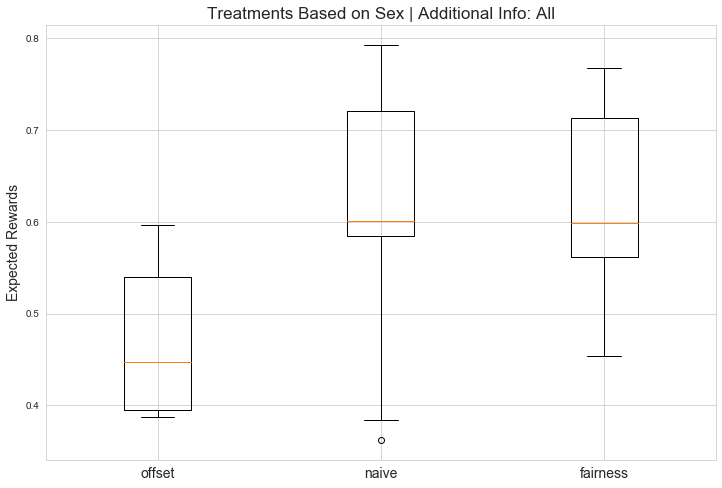

In [206]:

plt.figure(figsize=(12, 8))
plt.boxplot([offset['return_test'],naive['return_test'],fair['return_test']])
plt.xticks([1, 2, 3], ['offset','naive','fairness'],fontsize=14)
plt.ylabel('Expected Rewards',fontsize=14)
plt.title('Treatments Based on {} | Additional Info: {}'.format('Sex','All'),fontsize=17)
plt.show()

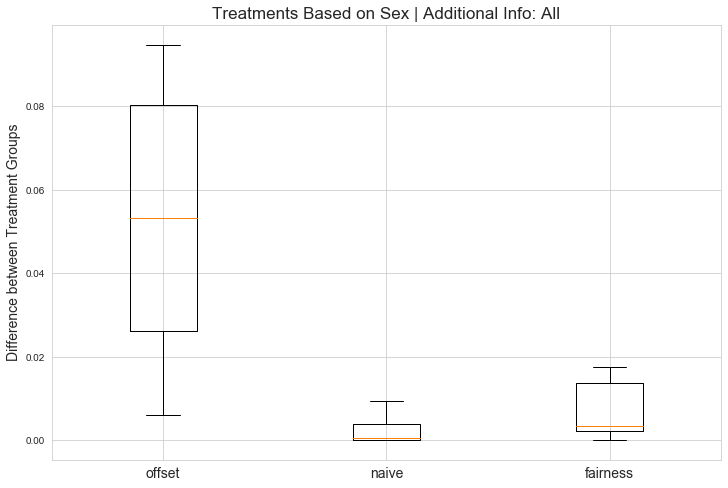

In [205]:
plt.figure(figsize=(12, 8))
plt.boxplot([offset['test_bqf_0_mean'],naive['test_bqf_0_mean'],fair['test_bqf_0_mean']],showfliers=True)
plt.xticks([1, 2, 3], ['offset','naive','fairness'],fontsize=14)
plt.ylabel('Difference between Treatment Groups',fontsize=14)
plt.title('Treatments Based on {} | Additional Info: {}'.format('Sex','All'),fontsize=17)
plt.show()

In [199]:
def plot_curve(x,y,name):   
    res = stats.linregress(x, y)
    plt.plot(x, y, 'o')
    plt.plot(x, res.intercept + res.slope*x, label=name)
    plt.legend(fontsize=14)

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


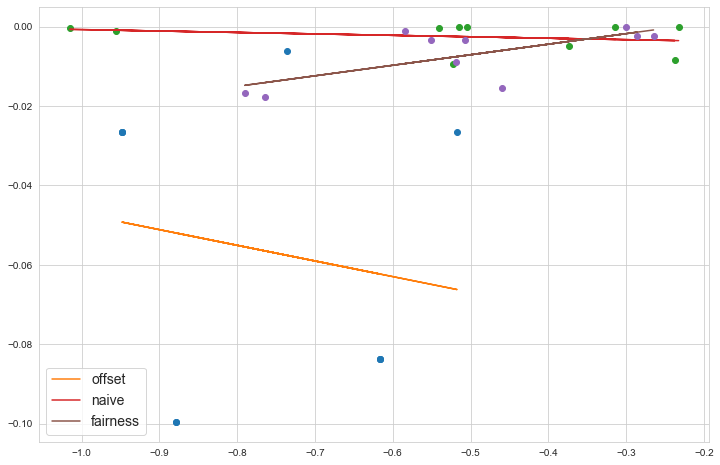

In [207]:
plt.figure(figsize=(12, 8))
plot_curve(offset['return_test'], np.log(1- offset['test_bqf_0_mean']),'offset')
plot_curve(naive['return_test'], np.log(1- naive['test_bqf_0_mean']),'naive')
plot_curve(fair['return_test'], np.log(1- fair['test_bqf_0_mean']),'fairness')